In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_differences(lst):
    return [abs(lst[i] - lst[i-1]) for i in range(1, len(lst))]

"""parameters"""
num_episode = 500
num_pc = 7
port_size = num_pc*2

path = "result_graphs"
algorithm_list = ["q-learning", "DQN", "ActorCritic", "PPO", "RAC"]
result_dict = {"_avgReward": [], "_success": [], "_iteration": []}
result_dict2 = {"_avgReward": [], "_success": [], "_iteration": []}
legend = ["*--", "^--", "o--", "X--", "s-"]


for i, algo in enumerate(algorithm_list):
    for j, cate in enumerate(list(result_dict.keys())):
        with open(os.path.join(path, algo + cate + ".p"), "rb") as f:
            lst = pickle.load(f)
            result_dict[cate].append(lst)
            if cate == "_avgReward":
                lst2 = calculate_differences(lst)
                result_dict2[cate].append(lst2)

with open("result_graphs/RAC_action_re.p", "rb") as f:
    reward_action = pickle.load(f)

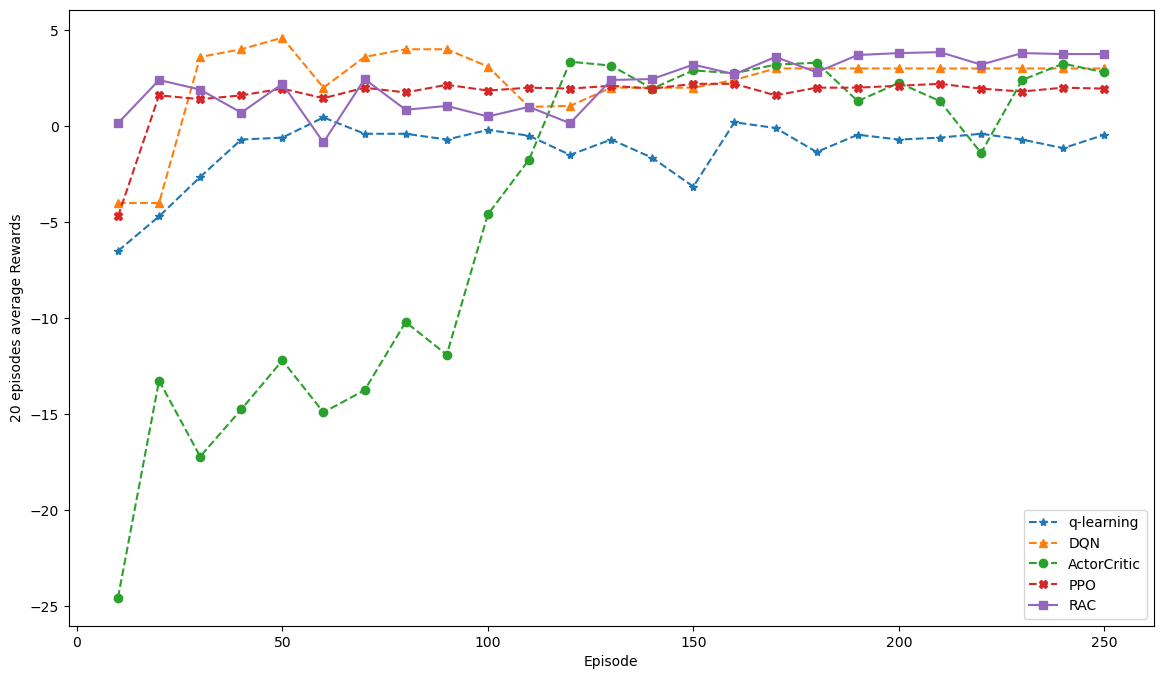

410 292 284 343 294 289 
360 188 218 240 220 220 
771 524 372 222 235 224 
374 241 243 236 238 241 
172 149 175 144 142 141 


In [3]:
#Reward
plt.figure(figsize=(14, 8))
x = np.arange(1, len(result_dict["_avgReward"][0])+1) * 10

for i, algo in enumerate(algorithm_list):
    plt.plot(x, result_dict["_avgReward"][i], legend[i], label=algo)

plt.legend(loc='best')
plt.xlabel('Episode')
plt.ylabel('20 episodes average Rewards')
plt.ylim = (-num_pc*1.2, num_pc*1.2)
plt.show()

for al in result_dict["_iteration"]:
    for ind in range(0, 30, 5):
        if ind != 0:
            ind -= 1
        print(al[ind], end=" ")
    print()
        

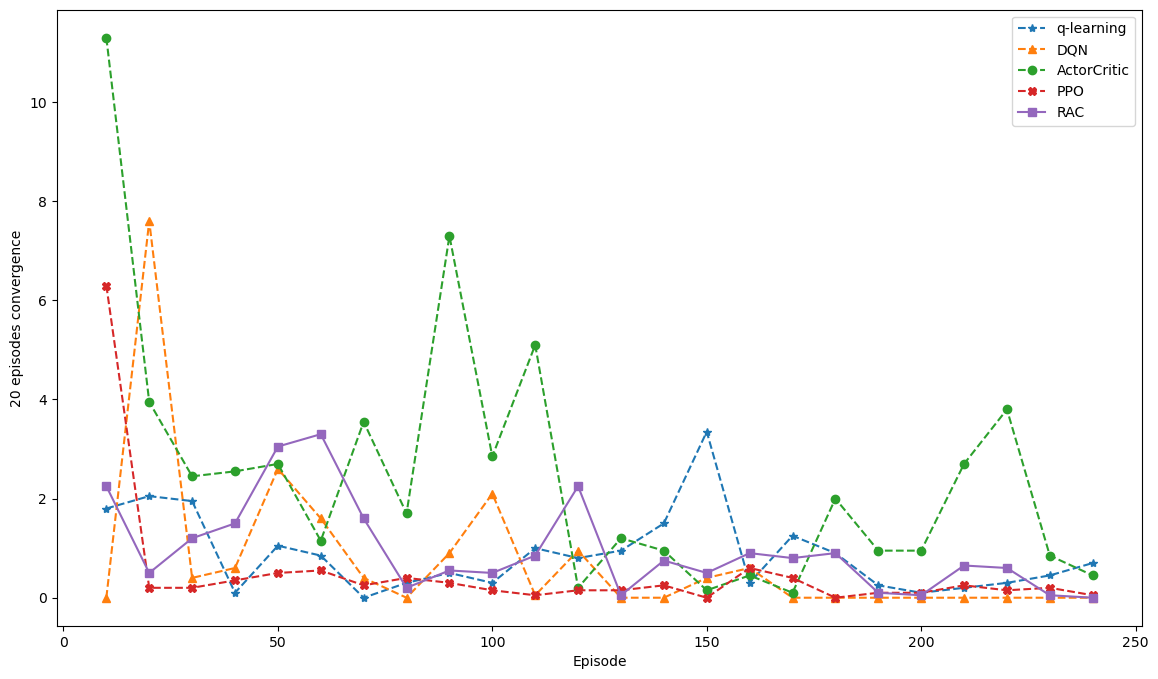

In [4]:
#Reward
plt.figure(figsize=(14, 8))
x = np.arange(1, len(result_dict2["_avgReward"][0])+1) * 10

for i, algo in enumerate(algorithm_list):
    plt.plot(x, result_dict2["_avgReward"][i], legend[i], label=algo)

plt.legend(loc='best')
plt.xlabel('Episode')
plt.ylabel('20 episodes convergence')
plt.ylim = (-num_pc*1.2, num_pc*1.2)
plt.show()

In [5]:
import pandas as pd

# 알고리즘 리스트를 기반으로 빈 DataFrame 생성
df = pd.DataFrame()

# 각 알고리즘에 대해
for i, algo in enumerate(algorithm_list):
    # 알고리즘의 보상을 DataFrame에 추가
    df[algo] = result_dict2["_avgReward"][i]

# 'Episode' 열 추가
df['Episode'] = np.arange(1, len(result_dict2["_avgReward"][0])+1) * 10

# DataFrame의 첫 행 저장
first_row = df.iloc[0]

# 나머지 행을 5개씩 그룹화
grouped = df.iloc[1:].groupby(df.iloc[1:].index // 5)

# 각 그룹의 평균 계산
df_avg = grouped.mean()

# 첫 행을 DataFrame에 다시 추가
df_avg = pd.concat([first_row.to_frame().T, df_avg])
df_avg = df_avg.drop('Episode', axis=1)
df_avg = df_avg.drop('RAC', axis=1)
# 인덱스 값 변경
df_avg.index = [0, 50, 100, 150, 200, 250]

# 업데이트된 DataFrame 출력
display(df_avg)

# import matplotlib.pyplot as plt

# # DataFrame을 이미지로 저장
# fig, ax =plt.subplots(figsize=(12,4)) # 이미지 크기 설정
# ax.axis('tight')
# ax.axis('off')
# ax.table(cellText=df.values,
#          colLabels=df.columns,
#          rowLabels=df.index,
#          cellLoc = 'center', 
#          loc='center')

# plt.savefig('df.png')

,q-learning,DQN,ActorCritic,PPO
0,1.8000,0.00,11.3000,6.3000
50,1.2875,2.80,2.9125,0.3125
100,0.3900,1.00,3.3100,0.3300
150,1.5200,0.28,1.5200,0.1200
200,0.5600,0.12,0.8900,0.2400
250,0.4125,0.00,1.9500,0.1625


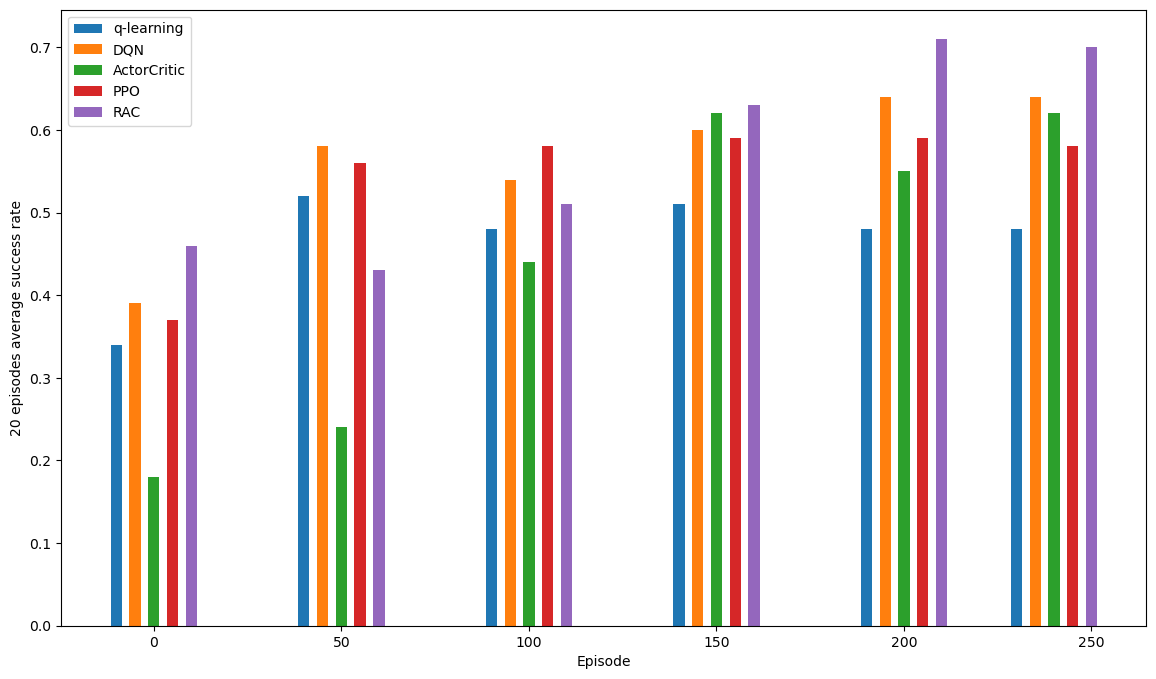

In [6]:
#success rate
x = [0, 5, 10, 15, 20, 24]
df = pd.DataFrame(result_dict["_success"], index=algorithm_list)[x]
df = pd.DataFrame(np.array(df).transpose(1, 0), index=x, columns=algorithm_list)
x_index = np.array(x)*10
bar_width = 3

plt.figure(figsize=(14, 8))
for i, algo in enumerate(algorithm_list):
    plt.bar(x_index+(i*5-10), df[algo], bar_width, label=algo)

plt.legend(loc='best')
plt.xlabel('Episode')
plt.ylabel('20 episodes average success rate')
plt.ylim = (-num_pc*1.2, num_pc*1.2)

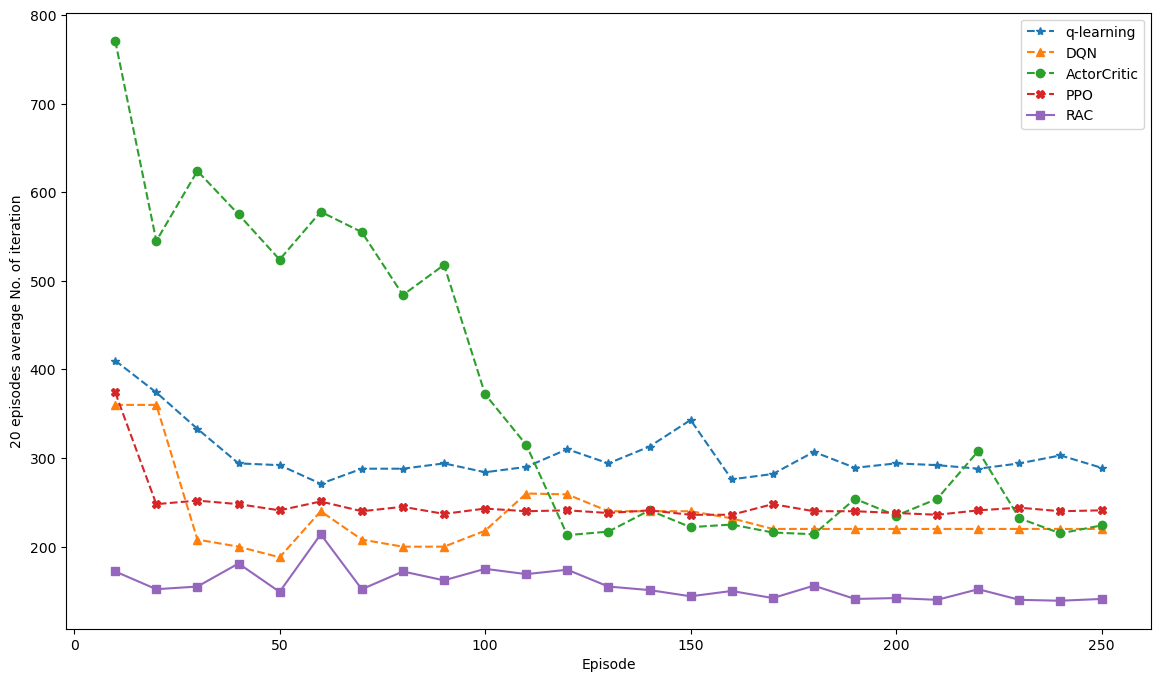

In [7]:
#No. of iteration
plt.figure(figsize=(14, 8))
x = np.arange(1, len(result_dict["_iteration"][0])+1) * 10

for i, algo in enumerate(algorithm_list):
    plt.plot(x, result_dict["_iteration"][i], legend[i], label=algo)

plt.legend(loc='best')
plt.xlabel('Episode')
plt.ylabel('20 episodes average No. of iteration')
plt.ylim = (-num_pc*1.2, num_pc*1.2)
plt.show() 

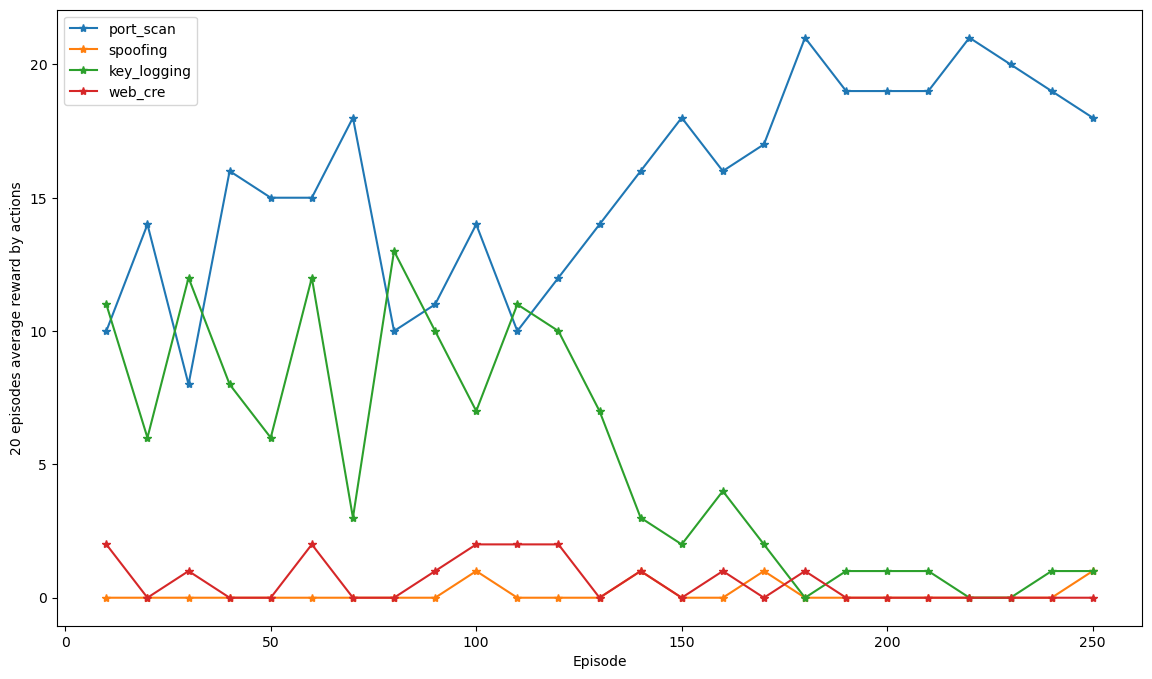

In [8]:
plt.figure(figsize=(14, 8))
df = pd.DataFrame(reward_action)
action_reward = {"port_scan" : df["port_scan"],
                "spoofing" : df["spoofing"],
                "key_logging" : df["key_logging"],
                "web_cre" : df["web_cre"]}

x = np.arange(1, len(df["port_scan"])+1) * 10

for i in action_reward:
    plt.plot(x, action_reward[i], '*-', label=i)

plt.legend(loc='best')
plt.xlabel('Episode')
plt.ylabel('20 episodes average reward by actions')
plt.show() 